# 言語処理100本ノック

https://nlp100.github.io/ja/

## 第5章 係り受け解析

### Install CaboCha

In [74]:
!apt install -y \
    curl \
    file \
    git \
    libmecab-dev \
    make \
    mecab \
    mecab-ipadic-utf8 \
    swig \
    xz-utils
!pip install mecab-python3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
make is already the newest version (4.1-9.1ubuntu1).
xz-utils is already the newest version (5.2.2-1.3).
libmecab-dev is already the newest version (0.996-5).
mecab is already the newest version (0.996-5).
mecab-ipadic-utf8 is already the newest version (2.7.0-20070801+main-1).
swig is already the newest version (3.0.12-1).
curl is already the newest version (7.58.0-2ubuntu3.8).
file is already the newest version (1:5.32-2ubuntu0.3).
git is already the newest version (1:2.17.1-1ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [75]:
import os
filename_crfpp = 'crfpp.tar.gz'
!wget "https://drive.google.com/uc?export=download&id=0B4y35FiV1wh7QVR6VXJ5dWExSTQ" -O $filename_crfpp
!tar zxvf $filename_crfpp
%cd CRF++-0.58
!./configure
!make
!make install
%cd ..
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/lib' 

--2020-04-22 13:23:17--  https://drive.google.com/uc?export=download&id=0B4y35FiV1wh7QVR6VXJ5dWExSTQ
Resolving drive.google.com (drive.google.com)... 74.125.134.113, 74.125.134.139, 74.125.134.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.134.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7urkeu2e1nsu5irhfmnea3kllk99ilnf/1587561750000/13553212398903315502/*/0B4y35FiV1wh7QVR6VXJ5dWExSTQ?e=download [following]
--2020-04-22 13:23:20--  https://doc-08-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7urkeu2e1nsu5irhfmnea3kllk99ilnf/1587561750000/13553212398903315502/*/0B4y35FiV1wh7QVR6VXJ5dWExSTQ?e=download
Resolving doc-08-74-docs.googleusercontent.com (doc-08-74-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-08-74-docs.googleusercontent.com (doc-08-74-docs.googl

In [76]:
FILE_ID = "0B4y35FiV1wh7SDd1Q1dUQkZQaUU"
FILE_NAME = "cabocha.tar.bz2"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt
!tar -xvf cabocha.tar.bz2

%cd cabocha-0.69
!./configure --with-mecab-config=`which mecab-config` --with-charset=UTF8
!make
!make check
!make install
%cd ..
!cabocha --version

--2020-04-22 13:23:36--  https://docs.google.com/uc?export=download&confirm=7v5x&id=0B4y35FiV1wh7SDd1Q1dUQkZQaUU
Resolving docs.google.com (docs.google.com)... 172.217.204.113, 172.217.204.100, 172.217.204.139, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-c4-docs.googleusercontent.com/docs/securesc/53ooa81g79j3ljdot78l7ncqsbbtfv0f/dhmrj51tis21kk6mktsmnlkqugj5t8i7/1587561750000/13553212398903315502/07121864153212068540Z/0B4y35FiV1wh7SDd1Q1dUQkZQaUU?e=download [following]
--2020-04-22 13:23:36--  https://doc-10-c4-docs.googleusercontent.com/docs/securesc/53ooa81g79j3ljdot78l7ncqsbbtfv0f/dhmrj51tis21kk6mktsmnlkqugj5t8i7/1587561750000/13553212398903315502/07121864153212068540Z/0B4y35FiV1wh7SDd1Q1dUQkZQaUU?e=download
Resolving doc-10-c4-docs.googleusercontent.com (doc-10-c4-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-10

In [77]:
%cd cabocha-0.69/python
!python setup.py build_ext
!python setup.py install
!ldconfig
%cd ../..

/content/cabocha-0.69/python
running build_ext
running install
running build
running build_py
running build_ext
running install_lib
running install_egg_info
Removing /usr/local/lib/python3.6/dist-packages/cabocha_python-0.69.egg-info
Writing /usr/local/lib/python3.6/dist-packages/cabocha_python-0.69.egg-info
/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

/content


In [78]:
!type cabocha
!cabocha --help

cabocha is /usr/local/bin/cabocha
CaboCha (Yet Another Japanese Dependency Structure Analyzer)
Copyright(C) 2001-2013 Taku Kudo, All rights reserved.

Usage: cabocha [options] files
 -f, --output-format=TYPE  set output format style
			    0 - tree(default)
			    1 - lattice
			    2 - tree + lattice
			    3 - XML
			    4 - CoNLL
 -I, --input-layer=LAYER   set input layer
			    0 - raw sentence layer(default)
			    1 - POS tagged layer
			    2 - POS tagger and Chunked layer
			    3 - POS tagged, Chunked and Feature selected layer
 -O, --output-layer=LAYER  set output layer
			    1 - POS tagged layer
			    2 - POS tagged and Chunked layer
			    3 - POS tagged, Chunked and Feature selected layer
			    4 - Parsed layer(default)
 -n, --ne=MODE             output NE tag
			    0 - without NE(default)
			    1 - output NE with chunk constraint
			    2 - output NE without chunk constraint
 -m, --parser-model=FILE   use FILE as parser model file
 -M, --chunker-model=FILE  use FILE 

In [79]:
# Install Japanese font
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-18ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


### Import dependencies

In [0]:
import numpy as np
from scipy.sparse.csgraph import shortest_path

import itertools

import pydot
from IPython.display import Image, display

from pprint import pprint

### `neko.txt.cabocha` 生成

In [81]:
!curl -fsSLO https://nlp100.github.io/data/neko.txt
!ls -l neko.txt

!cabocha -I0 -O4 -f1 -o neko.txt.cabocha neko.txt
!ls -l neko.txt.cabocha

-rw-r--r-- 1 root root 965825 Apr 22 13:24 neko.txt
-rw-r--r-- 1 root root 13208723 Apr 22 13:24 neko.txt.cabocha


In [82]:
!head -n 20 neko.txt.cabocha

* 0 -1D 0/0 0.000000
一	名詞,数,*,*,*,*,一,イチ,イチ
EOS
EOS
* 0 2D 0/0 -0.764522
　	記号,空白,*,*,*,*,　,　,　
* 1 2D 0/1 -0.764522
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
* 2 -1D 0/2 0.000000
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
EOS
* 0 2D 0/1 -1.911675
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
* 1 2D 0/0 -1.911675
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ


### 40. 係り受け解析結果の読み込み（形態素）

In [0]:
class Morph():
    """形態素を表すクラス"""

    def __init__(self, line):
        try:
            lines = line.split('\t')
            self.surface = lines[0]
            lines = lines[1].split(',')
            self.base = lines[6]
            self.pos = lines[0]
            self.pos1 = lines[1]
        except Exception as e:
            raise(e)

    def __str__(self):
        return 'Morph(surface: {}, base: {}, pos: {}, pos1: {})'.format(
            self.surface, self.base, self.pos, self.pos1
        )

    def __repr__(self):
        return self.__str__()

def surface_from(morphs):
    return ''.join([m.surface for m in morphs])

def poss_from(morphs):
    return [m.pos for m in morphs]

In [84]:
with open('neko.txt.cabocha', 'r') as f:
    neko = f.readlines()

c = 0
morphs = []
for line in neko:
    if line.startswith('* 0'):
        c += 1

    if c == 4:
        if any([line.startswith(key) for key in ['*', 'EOS']]):
            continue

        try:
            morphs.append(Morph(line))
        except Exception as e:
            print('Line: {}'.format(line))
            print('Error: {}'.format(e))

    if c > 4:
        break

pprint(morphs)

[Morph(surface: 　, base: 　, pos: 記号, pos1: 空白),
 Morph(surface: どこ, base: どこ, pos: 名詞, pos1: 代名詞),
 Morph(surface: で, base: で, pos: 助詞, pos1: 格助詞),
 Morph(surface: 生れ, base: 生れる, pos: 動詞, pos1: 自立),
 Morph(surface: た, base: た, pos: 助動詞, pos1: *),
 Morph(surface: か, base: か, pos: 助詞, pos1: 副助詞／並立助詞／終助詞),
 Morph(surface: とんと, base: とんと, pos: 副詞, pos1: 一般),
 Morph(surface: 見当, base: 見当, pos: 名詞, pos1: サ変接続),
 Morph(surface: が, base: が, pos: 助詞, pos1: 格助詞),
 Morph(surface: つか, base: つく, pos: 動詞, pos1: 自立),
 Morph(surface: ぬ, base: ぬ, pos: 助動詞, pos1: *),
 Morph(surface: 。, base: 。, pos: 記号, pos1: 句点)]


```
EOS
* 0 1D 1/2 1.058678
　	記号,空白,*,*,*,*,　,　,　
どこ	名詞,代名詞,一般,*,*,*,どこ,ドコ,ドコ
で	助詞,格助詞,一般,*,*,*,で,デ,デ
* 1 4D 0/2 -1.453749
生れ	動詞,自立,*,*,一段,連用形,生れる,ウマレ,ウマレ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
か	助詞,副助詞／並立助詞／終助詞,*,*,*,*,か,カ,カ
* 2 4D 0/0 -1.453749
とんと	副詞,一般,*,*,*,*,とんと,トント,トント
* 3 4D 0/1 -1.453749
見当	名詞,サ変接続,*,*,*,*,見当,ケントウ,ケントー
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
* 4 -1D 0/1 0.000000
つか	動詞,自立,*,*,五段・カ行イ音便,未然形,つく,ツカ,ツカ
ぬ	助動詞,*,*,*,特殊・ヌ,基本形,ぬ,ヌ,ヌ
。	記号,句点,*,*,*,*,。,。,。
EOS
```

### 41. 係り受け解析結果の読み込み（文節・係り受け）

In [0]:
class Chunk():
    """文節・係り受けを表すクラス"""

    def __init__(self, lines):
        self.morphs = []
        self.id = 0
        self.dst = -1
        self.srcs = []

        for line in lines:
            if line.startswith('*'):
                try:
                    self.id = line.split()[1]
                    self.dst = line.split()[2][:-1]
                except Exception as e:
                    print('dst parse error')
                    print('Line: {}'.format(line))
                    print('Error: {}'.format(e))

            else:
                try:
                    self.morphs.append(Morph(line))
                except Exception as e:
                    print('morph parse error')
                    print('Line: {}'.format(line))
                    print('Error: {}'.format(e))


    def __str__(self):
        return 'Chunk(id: {}, dst: {}, srcs: {}, morphs: {})'.format(
            self.id, self.dst, self.srcs, self.morphs
        )

    def __repr__(self):
        return self.__str__()

In [86]:
with open('neko.txt.cabocha', 'r') as f:
    neko = f.readlines()

c = 0
chunks = []
morphs = []
for line in neko:
    if line.startswith('* 0'):
        c += 1

    if c == 9:
        if any([line.startswith(key) for key in ['EOS']]):
            continue

        if line.startswith('*'):
            chunks.append(Chunk(morphs))
            morphs = [line]
        else:
            morphs.append(line)

    if c > 9:
        chunks.append(Chunk(morphs))
        break

for c in chunks:
    c.srcs = [s.id for s in chunks if s.dst == c.id]

pprint(chunks[1:])

[Chunk(id: 0, dst: 9, srcs: [], morphs: [Morph(surface: しかし, base: しかし, pos: 接続詞, pos1: *)]),
 Chunk(id: 1, dst: 2, srcs: [], morphs: [Morph(surface: その, base: その, pos: 連体詞, pos1: *)]),
 Chunk(id: 2, dst: 5, srcs: ['1'], morphs: [Morph(surface: 当時, base: 当時, pos: 名詞, pos1: 副詞可能), Morph(surface: は, base: は, pos: 助詞, pos1: 係助詞)]),
 Chunk(id: 3, dst: 4, srcs: [], morphs: [Morph(surface: 何, base: 何, pos: 名詞, pos1: 代名詞), Morph(surface: という, base: という, pos: 助詞, pos1: 格助詞)]),
 Chunk(id: 4, dst: 5, srcs: ['3'], morphs: [Morph(surface: 考, base: 考, pos: 名詞, pos1: 一般), Morph(surface: も, base: も, pos: 助詞, pos1: 係助詞)]),
 Chunk(id: 5, dst: 9, srcs: ['2', '4'], morphs: [Morph(surface: なかっ, base: ない, pos: 形容詞, pos1: 自立), Morph(surface: た, base: た, pos: 助動詞, pos1: *), Morph(surface: から, base: から, pos: 助詞, pos1: 接続助詞)]),
 Chunk(id: 6, dst: 7, srcs: [], morphs: [Morph(surface: 別段, base: 別段, pos: 副詞, pos1: 助詞類接続)]),
 Chunk(id: 7, dst: 9, srcs: ['6'], morphs: [Morph(surface: 恐し, base: 恐い, pos: 形容詞, pos1: 自

```
EOS
* 0 9D 0/0 -0.522486
しかし	接続詞,*,*,*,*,*,しかし,シカシ,シカシ
* 1 2D 0/0 1.179934
その	連体詞,*,*,*,*,*,その,ソノ,ソノ
* 2 5D 0/1 0.326076
当時	名詞,副詞可能,*,*,*,*,当時,トウジ,トージ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
* 3 4D 0/1 1.344316
何	名詞,代名詞,一般,*,*,*,何,ナニ,ナニ
という	助詞,格助詞,連語,*,*,*,という,トイウ,トユウ
* 4 5D 0/1 1.419801
考	名詞,一般,*,*,*,*,考,コウ,コー
も	助詞,係助詞,*,*,*,*,も,モ,モ
* 5 9D 0/2 -0.522486
なかっ	形容詞,自立,*,*,形容詞・アウオ段,連用タ接続,ない,ナカッ,ナカッ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
から	助詞,接続助詞,*,*,*,*,から,カラ,カラ
* 6 7D 0/0 0.572954
別段	副詞,助詞類接続,*,*,*,*,別段,ベツダン,ベツダン
* 7 9D 0/0 -0.522486
恐し	形容詞,自立,*,*,形容詞・アウオ段,文語基本形,恐い,コワシ,コワシ
* 8 9D 0/0 -0.522486
いとも	副詞,一般,*,*,*,*,いとも,イトモ,イトモ
* 9 -1D 0/2 0.000000
思わ	動詞,自立,*,*,五段・ワ行促音便,未然形,思う,オモワ,オモワ
なかっ	助動詞,*,*,*,特殊・ナイ,連用タ接続,ない,ナカッ,ナカッ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
。	記号,句点,*,*,*,*,。,。,。
EOS
```

### 42. 係り元と係り先の文節の表示

In [87]:
with open('neko.txt.cabocha', 'r') as f:
    neko = f.readlines()

book = []
chunks = []
morphs = []

for line in neko:

    if any([line.startswith(key) for key in ['EOS']]):
        continue

    if line.startswith('*'):
        chunks.append(Chunk(morphs))

        if line.startswith('* 0'):
            for c in chunks:
                c.srcs = [s.id for s in chunks if s.dst == c.id]
            book.append(chunks)
            chunks = []

        morphs = [line]
    else:
        morphs.append(line)

pprint(book[1:7])

[[Chunk(id: 0, dst: -1, srcs: [], morphs: [Morph(surface: 一, base: 一, pos: 名詞, pos1: 数)])],
 [Chunk(id: 0, dst: 2, srcs: [], morphs: [Morph(surface: 　, base: 　, pos: 記号, pos1: 空白)]),
  Chunk(id: 1, dst: 2, srcs: [], morphs: [Morph(surface: 吾輩, base: 吾輩, pos: 名詞, pos1: 代名詞), Morph(surface: は, base: は, pos: 助詞, pos1: 係助詞)]),
  Chunk(id: 2, dst: -1, srcs: ['0', '1'], morphs: [Morph(surface: 猫, base: 猫, pos: 名詞, pos1: 一般), Morph(surface: で, base: だ, pos: 助動詞, pos1: *), Morph(surface: ある, base: ある, pos: 助動詞, pos1: *), Morph(surface: 。, base: 。, pos: 記号, pos1: 句点)])],
 [Chunk(id: 0, dst: 2, srcs: [], morphs: [Morph(surface: 名前, base: 名前, pos: 名詞, pos1: 一般), Morph(surface: は, base: は, pos: 助詞, pos1: 係助詞)]),
  Chunk(id: 1, dst: 2, srcs: [], morphs: [Morph(surface: まだ, base: まだ, pos: 副詞, pos1: 助詞類接続)]),
  Chunk(id: 2, dst: -1, srcs: ['0', '1'], morphs: [Morph(surface: 無い, base: 無い, pos: 形容詞, pos1: 自立), Morph(surface: 。, base: 。, pos: 記号, pos1: 句点)])],
 [Chunk(id: 0, dst: 1, srcs: [], morphs: [M

In [88]:
ans_42 = []

for chunks in book:
    for c in chunks:
        if int(c.dst) != -1:
            ans_42.append('{}\t{}'.format(
                surface_from(c.morphs),
                surface_from([d.morphs for d in chunks if d.id == c.dst][0])
            ))

print(len(ans_42))
print('\n'.join(ans_42[:30]))

71771
　	猫である。
吾輩は	猫である。
名前は	無い。
まだ	無い。
　どこで	生れたか
生れたか	つかぬ。
とんと	つかぬ。
見当が	つかぬ。
何でも	薄暗い
薄暗い	所で
じめじめした	所で
所で	泣いて
ニャーニャー	泣いて
泣いて	記憶している。
いた事だけは	記憶している。
吾輩は	見た。
ここで	始めて
始めて	人間という
人間という	ものを
ものを	見た。
しかも	種族であったそうだ。
あとで	聞くと
聞くと	種族であったそうだ。
それは	種族であったそうだ。
書生という	人間中で
人間中で	種族であったそうだ。
一番	獰悪な
獰悪な	種族であったそうだ。
この	書生というのは
書生というのは	話である。


### 43. 名詞を含む文節が動詞を含む文節に係るものを抽出

In [89]:
ans_43 = []

for chunks in book:
    for c in chunks:
        if (
            int(c.dst) != -1
            and '名詞' in poss_from(c.morphs)
            and '動詞' in poss_from([d.morphs for d in chunks if d.id == c.dst][0])
        ):
            ans_43.append('{}\t{}'.format(
                surface_from(c.morphs),
                surface_from([d.morphs for d in chunks if d.id == c.dst][0])
            ))

print(len(ans_43))
print('\n'.join(ans_43[:30]))

29106
　どこで	生れたか
見当が	つかぬ。
所で	泣いて
ニャーニャー	泣いて
いた事だけは	記憶している。
吾輩は	見た。
ここで	始めて
ものを	見た。
あとで	聞くと
我々を	捕えて
掌に	載せられて
スーと	持ち上げられた
時	フワフワした
感じが	あったばかりである。
上で	落ちついて
顔を	見たのが
ものの	見始であろう。
ものだと	思った
感じが	残っている。
今でも	残っている。
第一毛をもって	装飾されべきはずの
顔が	つるつるして
その後	逢ったが
猫にも	逢ったが
一度も	出会わした
真中が	突起している。
中から	吹く。
ぷうぷうと煙を	吹く。
咽せぽくて	弱った。
人間の	飲む


### 44. 係り受け木の可視化

In [0]:
def visualize_chunks(chunks):
    """
    Chunkのリストを引数にとり、係り受け木を可視化する。
    """
    edges = []
    for c in chunks:
        if int(c.dst) != -1:
            edges.append((
                surface_from(c.morphs),
                surface_from([d.morphs for d in chunks if d.id == c.dst][0])
            ))

    n = pydot.Node('node')
    n.fontname = "ipagp.ttf"
    g = pydot.graph_from_edges(edges, directed=True)
    g.add_node(n)

    display(Image(g.create_png()))

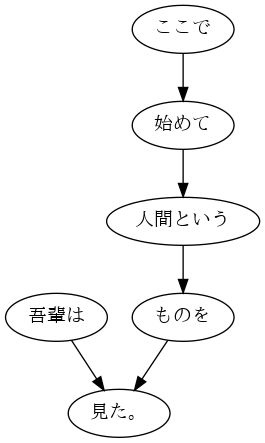

In [91]:
visualize_chunks(book[6])

### 45. 動詞の格パターンの抽出

In [0]:
def kaku_pattern(chunks):
    """
    文(chunks) を引数にとり、 述語と格のリスト を返す
    """
    kakus = []
    for c in chunks:
        for m in c.morphs:
            if m.pos == '動詞':
                jutsugo = m.base
                joshi = []
                for src_ms in [src_c.morphs for src_c in chunks if src_c.id in c.srcs]:
                    try:
                        joshi.append([j.base for j in src_ms if j.pos == '助詞'][-1])
                    except:
                        continue

                kakus.append(jutsugo + '\t' + ' '.join(sorted(joshi)))
                break

    return kakus

In [93]:
kakus = []
for chunks in book:
    kakus += kaku_pattern(chunks)

with open('kaku_pattern.txt', 'w') as f:
    f.write('\n'.join(kakus))

!head -n 20 kaku_pattern.txt

生れる	で
つく	か が
する	
泣く	で
する	て は
始める	で
見る	は を
聞く	で
捕える	を
煮る	て
食う	て
思う	から
載せる	に
持ち上げる	て と
する	
ある	が
落ちつく	で
見る	て を
見る	の
思う	と


In [94]:
!sort < kaku_pattern.txt | uniq -c | sort -n -k 1 -r | head -n 20

   2646 ある	が
   1559 つく	か が
    985 する	
    840 云う	は
    553 する	が で と
    380 つかむ	を
    364 思う	と
    334 見る	の
    257 かく	たり を
    253 かかる	が て
    214 かける	
    205 ある	まで
    197 云う	と に
    144 出る	も
    144 する	と は は は
    136 見える	と
    129 聞く	で
    123 行く	へ
    122 云う	
    121 見る	は を


In [95]:
!grep '^する' kaku_pattern.txt | cut -d $'\t' -f 2 | sed -e 's/ /\n/g' | sort | uniq -c | sort -n -k 1 -r | head -n 20

   4979 て
    452 まで
    435 
     98 として
     33 をもって
      3 と共に
      3 にあたって
      2 に対して
      1 に従って
      1 に対し


In [96]:
!grep '^見る' kaku_pattern.txt | cut -d $'\t' -f 2 | sed -e 's/ /\n/g' | sort | uniq -c | sort -n -k 1 -r | head -n 20

    827 は
     82 より
     80 
     12 ばかり
      1 に従って
      1 によって


In [97]:
!grep '^与える' kaku_pattern.txt | cut -d $'\t' -f 2 | sed -e 's/ /\n/g' | sort | uniq -c | sort -n -k 1 -r | head -n 20

     53 に
      1 けれども
      1 として


### 46. 動詞の格フレーム情報の抽出

In [0]:
def kaku_pattern2(chunks):
    """
    文(chunks) を引数にとり、 述語と格と文節のリスト を返す
    """
    kakus = []
    for c in chunks:
        for m in c.morphs:
            if m.pos == '動詞':
                jutsugo = m.base
                joshi = []
                for src_ms in [src_c.morphs for src_c in chunks if src_c.id in c.srcs]:
                    try:
                        joshi.append([(j.base, surface_from(src_ms)) for j in src_ms if j.pos == '助詞'][-1])
                    except:
                        continue

                joshi_ = sorted(joshi, key=lambda x: x[0])

                kakus.append(
                    jutsugo
                    + '\t'
                    + ' '.join([x[0] for x in joshi_])
                    + '\t'
                    + ' '.join([x[1] for x in joshi_])
                )
                break

    return kakus

In [99]:
kakus = []
for chunks in book:
    kakus += kaku_pattern2(chunks)

with open('kaku_pattern2.txt', 'w') as f:
    f.write('\n'.join(kakus))

!head -n 20 kaku_pattern2.txt

生れる	で	　どこで
つく	か が	生れたか 見当が
する		
泣く	で	所で
する	て は	泣いて いた事だけは
始める	で	ここで
見る	は を	吾輩は ものを
聞く	で	あとで
捕える	を	我々を
煮る	て	捕えて
食う	て	煮て
思う	から	なかったから
載せる	に	掌に
持ち上げる	て と	載せられて スーと
する		
ある	が	感じが
落ちつく	で	上で
見る	て を	落ちついて 顔を
見る	の	ものの
思う	と	ものだと


### 47. 機能動詞構文のマイニング

In [0]:
def kaku_pattern3(chunks):
    """
    文(chunks) を引数にとり、 「サ変接続名詞+を（助詞）」で構成される 述語と格と文節のリスト を返す
    """
    kakus = []
    is_sahen = False
    is_wo = False
    for c in chunks:
        for m in c.morphs:
            if m.pos1 == 'サ変接続':
                sahen = m.surface
                is_sahen = True

            if is_sahen and m.surface == 'を':
                sahen += m.surface
                is_wo = True

            if (
                is_sahen
                and is_wo
                and m.base == 'する'
            ):
                sahen += m.base
                joshi = []
                for src_ms in [src_c.morphs for src_c in chunks if src_c.id in c.srcs]:
                    try:
                        joshi.append([(j.base, surface_from(src_ms)) for j in src_ms if j.pos == '助詞'][-1])
                    except:
                        continue

                joshi_ = [j for j in joshi if j[1] not in sahen]
                joshi__ = sorted(joshi_, key=lambda x: x[0])

                j = ' '.join([x[0] for x in joshi__])
                b = ' '.join([x[1] for x in joshi__])
                if j != '' and b != '':
                    kakus.append(sahen + '\t' + j + '\t' + b)
                    is_sahen = False
                    is_wo = False
                    break

    return kakus

In [101]:
kakus = []
for chunks in book:
    kakus += kaku_pattern3(chunks)

with open('kaku_pattern3.txt', 'w') as f:
    f.write('\n'.join(kakus))

!head -n 20 kaku_pattern3.txt

決心をする	と	こうと
返報をする	んで	偸んで
昼寝をする	が	彼が
観察する	て を	同居して 彼等を
生活をする	が を を	我等猫族が 愛を 家族的生活を
憤慨する	て に	いって 大に
投書をする	て へ	やって ほととぎすへ
話をする	に	時に
昼寝をする	て	出て
写生する	として に は を	結果として 手初めに 彼は 吾輩を
失敬をする	て の へ を	失敬して 存分の 前へ 両足を
欠伸をする	から て て	なったから、 して、 押し出して
失望ををする	を	声を
報道をする	に	耳に
運動をする	が と は を	二時頃であったが、 茶園へと 吾輩は 歩を
佇立する	て と に	忘れて 念と、 前に
雑談をする	ながら は	寝転びながら 黒は
質問する	て で と の の は	向って あとで、 していると、 例のごとく 下のごとく 彼は
感心する	て を	あって、 気焔を
弁護する	を	己れを


In [102]:
!cut -d $'\t' -f 1 < kaku_pattern3.txt | sort | uniq -c | sort -n -k 1 -r | head -n 20

     26 返事をする
     20 挨拶をする
     17 ——をする
     13 話をする
      9 喧嘩をする
      7 呈出する
      6 研究する
      6 真似をする
      6 我慢する
      5 運動をする
      5 質問をする
      5 説明する
      5 相談をする
      5 発見する
      5 注意をする
      5 欠伸をする
      5 昼寝をする
      5 主張する
      4 降参をする
      4 辞儀をする


In [103]:
!awk -F '\t' '{split($2, k, " "); for(i in k)print $1, k[i]}'  kaku_pattern3.txt | sort | uniq -c | sort -n -k 1 -r | head -n 20

     47 返事をする と
     28 挨拶をする で
     24 ——をする と
     19 呈出する は
     18 話をする に
     13 欠伸をする て
     12 辞儀をする が
     10 研究する を
     10 真似をする で
     10 応用する が
     10 喧嘩をする で
      9 質問する て
      9 注意をする を
      9 ——ををする を
      8 頂戴する て
      8 運動をする が
      8 発見する を
      8 昼寝をする が
      8 我慢する を
      8 感心する て


### 48. 名詞から根へのパスの抽出

In [0]:
def make_path(chunk, chunks):
    if int(chunk.dst) == -1:
        return [surface_from(chunk.morphs)]

    return [surface_from(chunk.morphs)] + make_path(
        [c for c in chunks if chunk.dst == c.id][0],
        chunks
    )

def path_to_root(chunks):
    """
    すべての名詞を含む文節に対し，その文節から構文木の根に至るパスを抽出
    """
    paths = []
    for c in chunks:
        if '名詞' in poss_from(c.morphs):
            paths.append(make_path(c, chunks))

    return paths

In [105]:
paths = path_to_root(book[6])
print('\n'.join([' -> '.join(p) for p in paths]))

吾輩は -> 見た。
ここで -> 始めて -> 人間という -> ものを -> 見た。
人間という -> ものを -> 見た。
ものを -> 見た。


In [106]:
paths = []
for chunks in book:
    paths += path_to_root(chunks)

print('\n'.join([' -> '.join(p) for p in paths[:30]]))

一
吾輩は -> 猫である。
猫である。
名前は -> 無い。
　どこで -> 生れたか -> つかぬ。
見当が -> つかぬ。
何でも -> 薄暗い -> 所で -> 泣いて -> 記憶している。
所で -> 泣いて -> 記憶している。
ニャーニャー -> 泣いて -> 記憶している。
いた事だけは -> 記憶している。
記憶している。
吾輩は -> 見た。
ここで -> 始めて -> 人間という -> ものを -> 見た。
人間という -> ものを -> 見た。
ものを -> 見た。
あとで -> 聞くと -> 種族であったそうだ。
それは -> 種族であったそうだ。
書生という -> 人間中で -> 種族であったそうだ。
人間中で -> 種族であったそうだ。
一番 -> 獰悪な -> 種族であったそうだ。
獰悪な -> 種族であったそうだ。
種族であったそうだ。
書生というのは -> 話である。
我々を -> 捕えて -> 煮て -> 食うという -> 話である。
話である。
当時は -> なかったから -> 思わなかった。
何という -> 考も -> なかったから -> 思わなかった。
考も -> なかったから -> 思わなかった。
彼の -> 掌に -> 載せられて -> 持ち上げられた -> 時 -> フワフワした -> 感じが -> あったばかりである。
掌に -> 載せられて -> 持ち上げられた -> 時 -> フワフワした -> 感じが -> あったばかりである。


### 49. 名詞間の係り受けパスの抽出

In [0]:
def make_path2(c1, c2, chunks, X=False):
    """
    文節iから構文木の根に至る経路上に文節jが存在する場合: 文節iから文節jのパスを表示
    """
    s = ''
    if int(c1.id) == int(c2.id):
        for m in c2.morphs:
            if m.pos == '名詞':
                return [s + 'Y']
            else:
                s += m.surface

    else:
        for m in c1.morphs:
            if X and m.pos == '名詞':
                X = False
                s += 'X'
            else:
                s += m.surface

        return [s] + make_path2(
            [c for c in chunks if c1.dst == c.id][0],
            c2,
            chunks
        )

def make_path3(c1, c2, chunks, X=False, Y=False):
    """
    上記以外で，文節iと文節jから構文木の根に至る経路上で共通の文節kで交わる場合: 
    文節iから文節kに至る直前のパスと文節jから文節kに至る直前までのパス，文節kの内容を” | “で連結して表示
    """
    s = ''
    for m in c1.morphs:
        if X and m.pos == '名詞':
            X = False
            s += 'X'
        elif Y and m.pos == '名詞':
            Y = False
            s += 'Y'
        else:
            s += m.surface

    if int(c1.id) == int(c2.id):
        return [s]

    else:
        return [s] + make_path3(
            [c for c in chunks if c1.dst == c.id][0],
            c2,
            chunks
        )

def get_path(start, goal, pred):
    """2点間の最短ルート取得"""
    return get_path_row(start, goal, pred[start])

def get_path_row(start, goal, pred_row):
    path = []
    i = goal
    while i != start and i >= 0:
        path.append(i)
        i = pred_row[i]
    if i < 0:
        return []
    path.append(i)
    return path[::-1]

def path_to_root(chunks):
    # 係り受け木を行列で表す
    route = np.zeros((len(chunks), len(chunks)))
    for c in chunks:
        if int(c.dst) != -1:
            route[int(c.id), int(c.dst)] = 1

    # 最短ルート一覧を取得
    _, pre = shortest_path(route, directed=False, return_predecessors=True)

    # 名詞句動詞の最短距離を取得
    norm_in_c = [c for c in chunks if '名詞' in poss_from(c.morphs)]

    paths = []
    for cs in itertools.combinations(norm_in_c, 2):
        route = get_path(int(cs[0].id), int(cs[1].id), pre)

        if max(route) == route[-1]:
            path = make_path2(cs[0], cs[1], chunks, True)
            paths.append(' -> '.join(path))
        else:
            for i, r in enumerate(route):
                if route[i] > route[i+1]:
                    px = make_path3(
                        cs[0],
                        [c for c in chunks if int(c.id) == route[i-1]][0],
                        chunks,
                        X=True
                    )
                    py = make_path3(
                        cs[1],
                        [c for c in chunks if int(c.id) == route[i+1]][0],
                        chunks,
                        Y=True
                    )
                    pz = make_path3(
                        [c for c in chunks if int(c.id) == route[i]][0],
                        [c for c in chunks if int(c.id) == route[i]][0],
                        chunks
                    )
                    break

            paths.append(' | '.join([
                ' -> '.join(px),
                ' -> '.join(py),
                ' -> '.join(pz)
            ]))

    return paths

In [108]:
paths = path_to_root(book[6])

pprint(paths)

['Xは | Yで -> 始めて -> 人間という -> ものを | 見た。',
 'Xは | Yという -> ものを | 見た。',
 'Xは | Yを | 見た。',
 'Xで -> 始めて -> Y',
 'Xで -> 始めて -> 人間という -> Y',
 'Xという -> Y']


In [109]:
paths = []
for chunks in book:
    paths += path_to_root(chunks)

print('\n'.join(paths[:30]))

Xは -> Y
　Xで -> 生れたか | Yが | つかぬ。
Xでも -> 薄暗い -> Y
Xでも -> 薄暗い -> 所で | Y | 泣いて
Xでも -> 薄暗い -> 所で -> 泣いて | Yだけは | 記憶している。
Xでも -> 薄暗い -> 所で -> 泣いて -> Y
Xで | Y | 泣いて
Xで -> 泣いて | Yだけは | 記憶している。
Xで -> 泣いて -> Y
X -> 泣いて | Yだけは | 記憶している。
X -> 泣いて -> Y
Xだけは -> Y
Xは | Yで -> 始めて -> 人間という -> ものを | 見た。
Xは | Yという -> ものを | 見た。
Xは | Yを | 見た。
Xで -> 始めて -> Y
Xで -> 始めて -> 人間という -> Y
Xという -> Y
Xで -> 聞くと | Yは | 種族であったそうだ。
Xで -> 聞くと | Yという -> 人間中で | 種族であったそうだ。
Xで -> 聞くと | Y中で | 種族であったそうだ。
Xで -> 聞くと | Y -> 獰悪な | 種族であったそうだ。
Xで -> 聞くと | Yな | 種族であったそうだ。
Xで -> 聞くと -> Y
Xは | Yという -> 人間中で | 種族であったそうだ。
Xは | Y中で | 種族であったそうだ。
Xは | Y -> 獰悪な | 種族であったそうだ。
Xは | Yな | 種族であったそうだ。
Xは -> Y
Xという -> Y
